In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


# Разграничим наши данные для обучения и валидации

In [3]:
train_images = np.load('data\lego-train-images.npy')
train_labels = np.load('data\lego-train-labels.npy')
test_images = np.load('data\lego-test-images.npy')
test_labels = np.load('data\lego-test-labels.npy')

Загруженные нами метки представляют собой целочисленные значения от 1 до 10. Целочисленные значения удобны для понимания и прогнозирования модели, но нам сложно их понять, когда мы работаем с данными. Давайте добавим несколько удобочитаемых имен для меток, которые мы пытаемся предсказать.

In [4]:
# For humans:
class_names = ['2x3 Brick', '2x2 Brick', '1x3 Brick', '2x1 Brick', '1x1 Brick', 
               '2x2 Macaroni', '2x2 Curved End', 'Cog 16 Tooth', '1x2 Handles', '1x2 Grill']

# Or the real LEGO codes:
# class_names = ['3002', '3003', '3622', '3004', '3005', '3063', '47457', '94925', '3839a', '2412b']

In [5]:
print(train_images[0].shape)
print(test_images[0].shape)

(48, 48, 1)
(48, 48, 1)


# Создаём модель CNN

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48, 48)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Обучение и валидация модели

In [8]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(train_images, train_labels))

Epoch 1/5
15/15 [==============================] - 1s 18ms/step - loss: 63.9724 - acc: 0.3392 - val_loss: 12.7600 - val_acc: 0.6098
Epoch 2/5
15/15 [==============================] - 0s 8ms/step - loss: 8.0545 - acc: 0.7162 - val_loss: 3.2954 - val_acc: 0.8204
Epoch 3/5
15/15 [==============================] - 0s 8ms/step - loss: 1.7445 - acc: 0.8825 - val_loss: 0.4722 - val_acc: 0.9490
Epoch 4/5
15/15 [==============================] - 0s 8ms/step - loss: 0.6883 - acc: 0.9357 - val_loss: 0.2377 - val_acc: 0.9734
Epoch 5/5
15/15 [==============================] - 0s 8ms/step - loss: 0.9848 - acc: 0.9113 - val_loss: 0.2086 - val_acc: 0.9667


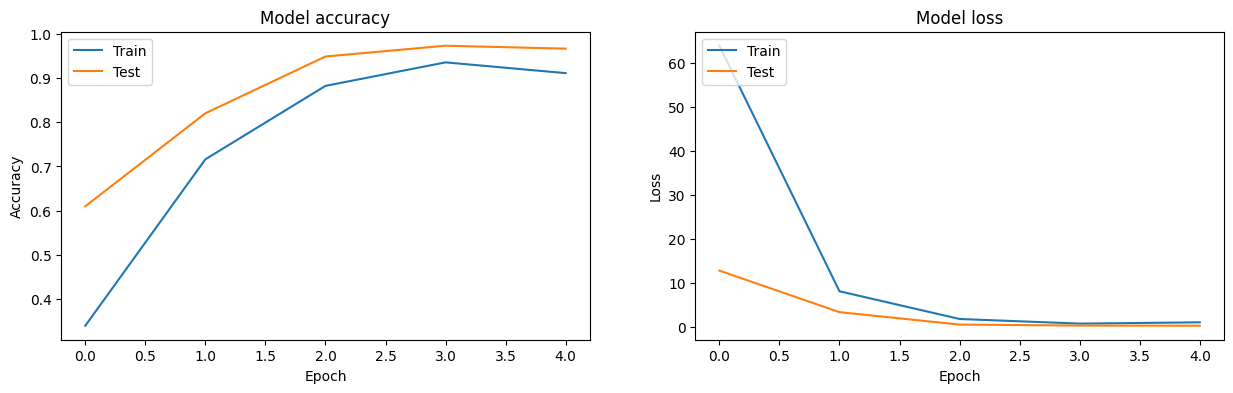

In [9]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
# Plot training accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Предсказание одного занчения

Нам нужно сделать одно быстрое преобразование этого изображения, прежде чем мы сможем увидеть, что думает модель. Метод ```predict``` ожидает коллекцию изображений, поэтому мы создаем коллекцию из одного изображения

In [10]:
test_image_number = 65

img = test_images[test_image_number]
img = (np.expand_dims(img,0))
img.shape

(1, 48, 48, 1)

In [11]:
predictions_single = model.predict(img)
predictions_single

1/1 [==============================] - 0s 180ms/step


array([[0.0000000e+00, 0.0000000e+00, 1.3222023e-08, 3.6005051e-05,
        0.0000000e+00, 9.9996400e-01, 4.4207747e-30, 6.8929966e-30,
        2.4559887e-11, 0.0000000e+00]], dtype=float32)

In [12]:
prediction_result = np.argmax(predictions_single)
probability = np.max(predictions_single)
real_result = class_names[test_labels[test_image_number]]
print(f"Predicted class {prediction_result}, which is {class_names[prediction_result]}.")
print(f"The model thinks there is a {probability*100:.2f}% probability of this brick being correct.")
print(f"Real result is {real_result}.")

Predicted class 5, which is 2x2 Macaroni.
The model thinks there is a 100.00% probability of this brick being correct.
Real result is 2x2 Macaroni.


In [13]:
# Function to display the prediction results in a graph:
def plot_value_array(predictions_array, true_label, image):
    predicted_label = np.argmax(predictions_array)
    predicted_probability = 100 * np.max(predictions_array)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.axis('off')
    ax1.imshow(image, cmap='gray')
    color = 'green' if predicted_label == true_label else 'red'
    ax1.set_title(f"{class_names[predicted_label]} {predicted_probability:2.0f}% ({class_names[true_label]})", color=color)
    
    plot = ax2.bar(range(len(predictions_array)), predictions_array, color="#777777")
    ax2.set_xticks(range(len(class_names)), class_names, rotation=80)
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('green')
    
    plt.show()

Давайте построим гистограмму, используя вспомогательную функцию. Это дает нам представление о том, насколько хорошо модель классифицировала это изображение. Прогнозируемая метка будет красной, если она отличается от фактической метки. Фактическая этикетка будет зеленой.

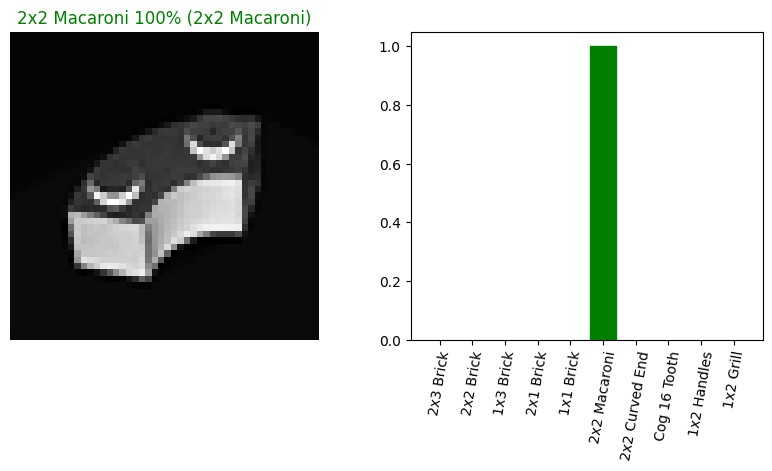

In [14]:
plot_value_array(predictions_array=predictions_single[0], 
                 true_label=test_labels[test_image_number], 
                 image=test_images[test_image_number])

## Предсказание группы

In [26]:
from sklearn.metrics import accuracy_score

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

overall_accuracy = accuracy_score(test_labels, predicted_labels)
print("Overall Accuracy:", overall_accuracy)

5/5 [==============================] - 0s 4ms/step
Overall Accuracy: 0.9733333333333334
